In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Checking Null Values in the Dataset

In [6]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Statistics About the Dataset

In [7]:
df.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


### Dropping Irrelevant Features

In [8]:
df = df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [9]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Encoding Categorical Data

In [10]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [11]:
# Converting to numerical values
df['Gender'] = df['Gender'].map({'Male':1,'Female':0}).astype('int')
df['Geography']= df['Geography'].map({'France':0,'Spain':1,'Germany':2}).astype('int')

In [12]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,1,0,43,2,125510.82,1,1,1,79084.10,0


In [13]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [14]:
import seaborn as sns

<Axes: xlabel='Exited', ylabel='count'>

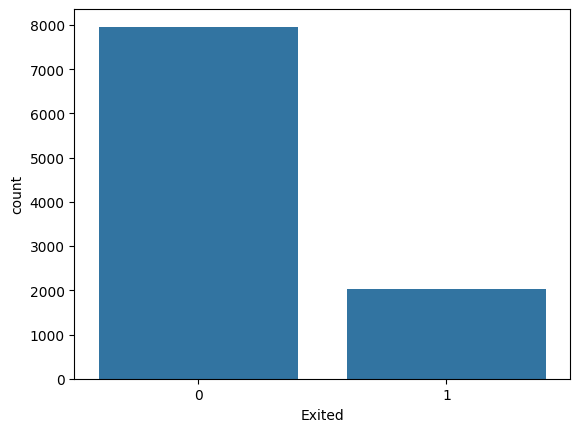

In [15]:
sns.countplot(data=df, x='Exited')

In [16]:
#Separating Dependent and indepent variable
X = df.drop('Exited',axis=1)
y = df['Exited']

### Handling Imbalanced Data with SMOTE(Synthetic Minority Oversampling Technique)

In [17]:
from imblearn.over_sampling import SMOTE

In [18]:
X_res, y_res = SMOTE().fit_resample(X,y)

In [19]:
y_res.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

# Splitting the dataset into the training set and test set

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train,y_test = train_test_split(X_res,y_res, test_size=0.20,random_state=42)

### Feature Scaling

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
sc = StandardScaler()

In [24]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
log = LogisticRegression()

In [27]:
log.fit(X_train,y_train)

LogisticRegression()

In [28]:
y_pred1 = log.predict(X_test)

### SVC

In [29]:
from sklearn import svm

In [30]:
svm = svm.SVC()

In [31]:
svm.fit(X_train,y_train)

SVC()

In [32]:
y_pred2 = svm.predict(X_test)

### KNeighbours Classifier

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
knn = KNeighborsClassifier()

In [35]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [36]:
y_pred3 = knn.predict(X_test)

### Decision Tree classifier

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
dt = DecisionTreeClassifier()

In [39]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [40]:
y_pred4 = dt.predict(X_test)

### Random Forest Classifer

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
rf = RandomForestClassifier()

In [43]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [44]:
y_pred5 = rf.predict(X_test)

### Gradient Boosting Classifier

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

In [46]:
gbc = GradientBoostingClassifier()

In [47]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [48]:
y_pred6 = gbc.predict(X_test)

## Scores of all models:

In [49]:
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score

In [50]:
scores = pd.DataFrame({'Models':['LR','SVC', 'KNN', 'DT','RF','GBC'],
                           'Accuracy':[accuracy_score(y_test,y_pred1),
                                       accuracy_score(y_test,y_pred2),
                                       accuracy_score(y_test,y_pred3),
                                       accuracy_score(y_test,y_pred4),
                                       accuracy_score(y_test,y_pred5),
                                       accuracy_score(y_test,y_pred6),],
                            'Precision_Score':[precision_score(y_test,y_pred1),
                                       precision_score(y_test,y_pred2),
                                       precision_score(y_test,y_pred3),
                                       precision_score(y_test,y_pred4),
                                       precision_score(y_test,y_pred5),
                                       precision_score(y_test,y_pred6),],
                            'Recall_score': [recall_score(y_test,y_pred1),
                                       recall_score(y_test,y_pred2),
                                       recall_score(y_test,y_pred3),
                                       recall_score(y_test,y_pred4),
                                       recall_score(y_test,y_pred5),
                                       recall_score(y_test,y_pred6)],
                            'F1_score': [f1_score(y_test,y_pred1),
                                         f1_score(y_test,y_pred2),
                                         f1_score(y_test,y_pred3),
                                         f1_score(y_test,y_pred4),
                                         f1_score(y_test,y_pred5),
                                         f1_score(y_test,y_pred6)]
                              })

In [51]:
scores

,Models,Accuracy,Precision_Score,Recall_score,F1_score
0,LR,0.766478,0.753923,0.773342,0.763509
1,SVC,0.829567,0.820431,0.832582,0.826462
2,KNN,0.812932,0.792303,0.835158,0.813166
3,DT,0.783114,0.764742,0.801674,0.782773
4,RF,0.854049,0.845616,0.857051,0.851295
5,GBC,0.827370,0.827564,0.815840,0.821660


### CONCLUSION: The RandomForest algorithm gives us the maximum Accuracy, precision score, recall score and F1 score compared to the other 5 Machine Learning Classification Algorithms.

# Saving the Model

In [52]:
#X_res = sc.fit_transform(X_res)

In [53]:
#rf.fit(X_res,y_res)

In [54]:
#import joblib

In [55]:
#joblib.dump(rf,'churn_predict_model')

In [56]:
#model = joblib.load('churn_predict_model')